# Analysis of US Presidential Election 2016
- Joining data from different data sources
- Visualizing and modeling the relationship between sociodemographics and election results
- Using choroplethrMaps to create map plots of sociodemographics and election results

In [1]:
us_pres_2016 <- read.csv("https://assets.datacamp.com/production/repositories/1934/datasets/2477e29d8e9588547785f958f83ce247340573e8/us_pres_2016_by_county.csv",
                        header = TRUE, sep = ",")
head(us_pres_2016)

,county.fips,county.name,state.name,party,vote.count,county.total.count,national.party.percent,national.count,is.national.winner
,<int>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<lgl>
1,45001,abbeville,south carolina,D,3741,10775,48.098104,135851595,FALSE
2,45001,abbeville,south carolina,O,271,10775,5.789663,135851595,FALSE
3,45001,abbeville,south carolina,R,6763,10775,46.112232,135851595,TRUE
4,22001,acadia,louisiana,D,5638,27389,48.098104,135851595,FALSE
5,22001,acadia,louisiana,O,589,27389,5.789663,135851595,FALSE
6,22001,acadia,louisiana,R,21162,27389,46.112232,135851595,TRUE


#### Wrangling data
Wrangling data in such a fashion that national values are eliminated, both parties have a column each, and adding a column for Democratic pct.

In [5]:
# Deselecting the is.national.winner, national.count, and national.party.percent variables
uspres_results.slim <- us_pres_2016 %>%
  select(-c(is.national.winner, national.count, national.party.percent))

library(tidyr)

# Spreading party and votes to their own columns
uspres_county <- uspres_results.slim %>%
  spread(key = party, value = vote.count)

# Adding a variable to the uspres_county dataset to store the Democrat's percentage of votes
uspres_county <- uspres_county %>%
  mutate(Dem.pct = D/county.total.count)

Warning message:
"package 'tidyr' was built under R version 3.6.3"


#### Loading demographic data

In [7]:
library(choroplethr)

# Loading the county demographic data
data(df_county_demographics)
head(df_county_demographics)

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,54907,76,18,1,2,24571,668,37.5
2,1003,187114,83,9,1,4,26766,693,41.5
3,1005,27321,46,46,0,5,16829,382,38.3
4,1007,22754,75,22,0,2,17427,351,39.4
5,1009,57623,88,1,0,8,20730,403,39.6
6,1011,10746,22,71,0,6,18628,276,39.6


#### Joining data via left_join()

In [8]:
library(dplyr)
df_county_demographics <- df_county_demographics %>%
  rename("county.fips" = region)

# Joining county demographic with vote share data via its FIPS code
county_merged <- left_join(df_county_demographics,
                         uspres_county, by = "county.fips")

head(county_merged)

,county.fips,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age,county.name,state.name,county.total.count,D,O,R,Dem.pct
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>
1,1001,54907,76,18,1,2,24571,668,37.5,autauga,alabama,24973,5936,865,18172,0.23769671
2,1003,187114,83,9,1,4,26766,693,41.5,baldwin,alabama,95215,18458,3874,72883,0.19385601
3,1005,27321,46,46,0,5,16829,382,38.3,barbour,alabama,10469,4871,144,5454,0.46527844
4,1007,22754,75,22,0,2,17427,351,39.4,bibb,alabama,8819,1874,207,6738,0.21249575
5,1009,57623,88,1,0,8,20730,403,39.6,blount,alabama,25588,2156,573,22859,0.08425825
6,1011,10746,22,71,0,6,18628,276,39.6,bullock,alabama,4710,3530,40,1140,0.74946921


#### Using geom_smooth() from ggplot2 to visualize relationship
    method = "lm"

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 44 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 44 rows containing missing values (geom_point)."


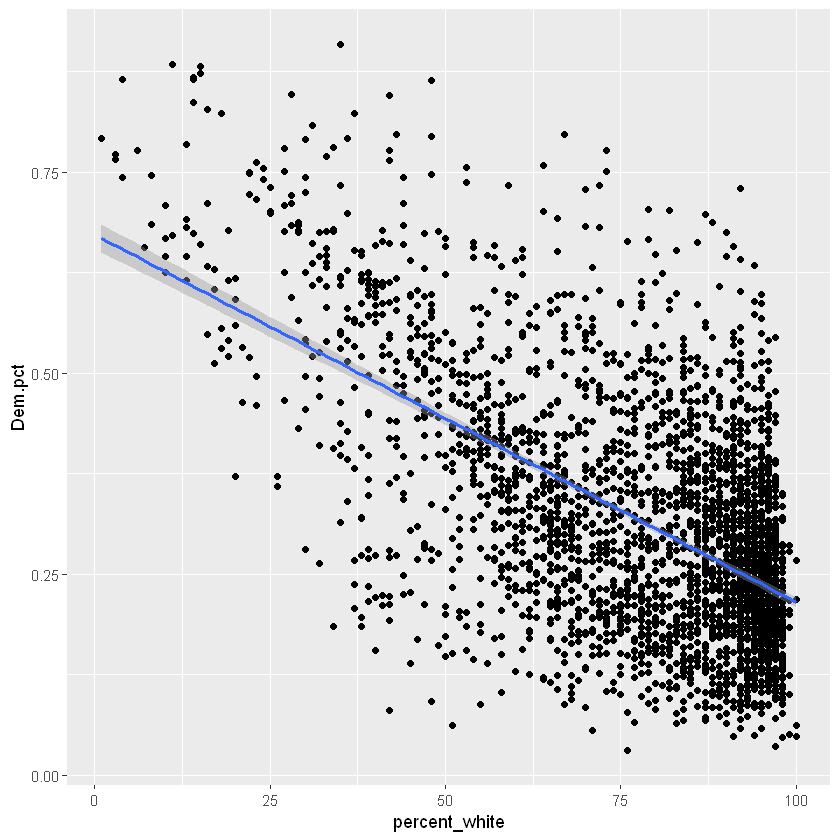

In [9]:
library(ggplot2)
ggplot(county_merged, aes(x= percent_white, y= Dem.pct)) +
  geom_point() +
  geom_smooth(method="lm")

## Mapping the US 2016 Election Results

Warning message:
"package 'choroplethrMaps' was built under R version 3.6.2"
Warning message in self$bind():
"The following regions were missing and are being set to NA: 17049, 17065, 2050, 17079, 2105, 17175, 2122, 17101, 17127, 2150, 17159, 17165, 2164, 2180, 2188, 2240, 2090, 2198, 15005, 2100, 2170, 17151, 2016, 2060, 2290, 17059, 17067, 2282, 17185, 2070, 2110, 2130, 2185, 2195, 2220, 2230, 2020, 2068, 2013, 2261, 2270, 2275, 17003, 17047"


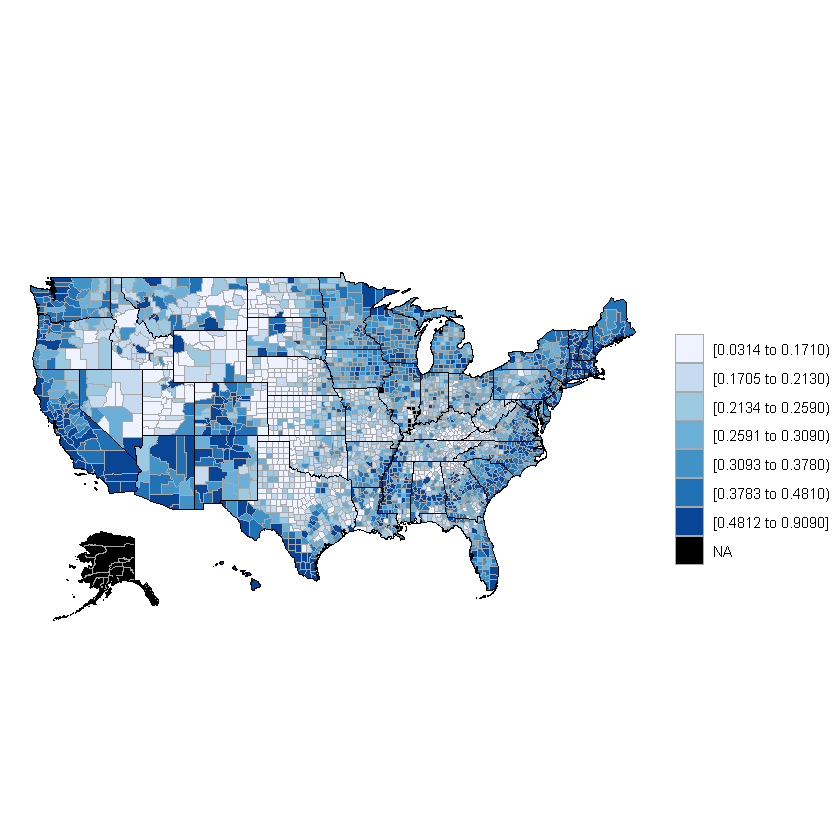

In [10]:
library(choroplethrMaps)

# Renaming the county.fips and Dem.pct variables from our dataset to "region" and "value"
county_map <- county_merged %>%
  rename("region" = county.fips,
                "value" = Dem.pct)

# Creating the map with choroplethrMaps's county_choropleth()
democratic_map <- county_choropleth(county_map)

democratic_map

Warning message:
"package 'gridExtra' was built under R version 3.6.2"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:acs':

    combine




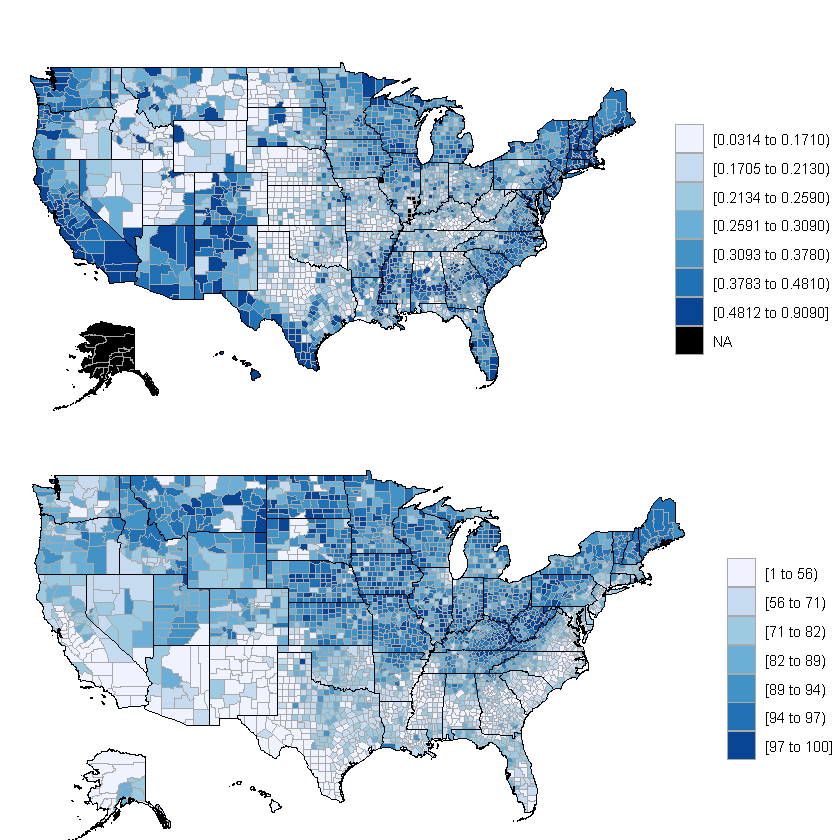

In [11]:
# Renaming variables from the dataset
county_map <- county_merged %>%
  rename("region" = county.fips,
         "value" = percent_white)

# Creating the map with choroplethr's county_choropleth()
white_map <- county_choropleth(county_map)

# Print the maps side-by-side
library(gridExtra)
grid.arrange(democratic_map, white_map)

## Predicting the Democratic vote by socio-demographics

In [12]:
# Fitting a linear model to predict Dem.pct dependent on percent_white in each county
fit <- lm(Dem.pct ~ percent_white, data=county_merged)
summary(fit)


Call:
lm(formula = Dem.pct ~ percent_white, data = county_merged)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39987 -0.08303 -0.00903  0.07281  0.47761 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.6719046  0.0090408   74.32   <2e-16 ***
percent_white -0.0045684  0.0001123  -40.68   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1227 on 3097 degrees of freedom
  (44 observations deleted due to missingness)
Multiple R-squared:  0.3482,	Adjusted R-squared:  0.348 
F-statistic:  1655 on 1 and 3097 DF,  p-value: < 2.2e-16
